In [65]:
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

In [66]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

Загружаем данные

In [4]:
# %%time
# from sklearn.datasets import fetch_rcv1
# rcv1 = fetch_rcv1()

CPU times: user 2min 49s, sys: 17.5 s, total: 3min 6s
Wall time: 12min 36s


### Подготовка данных

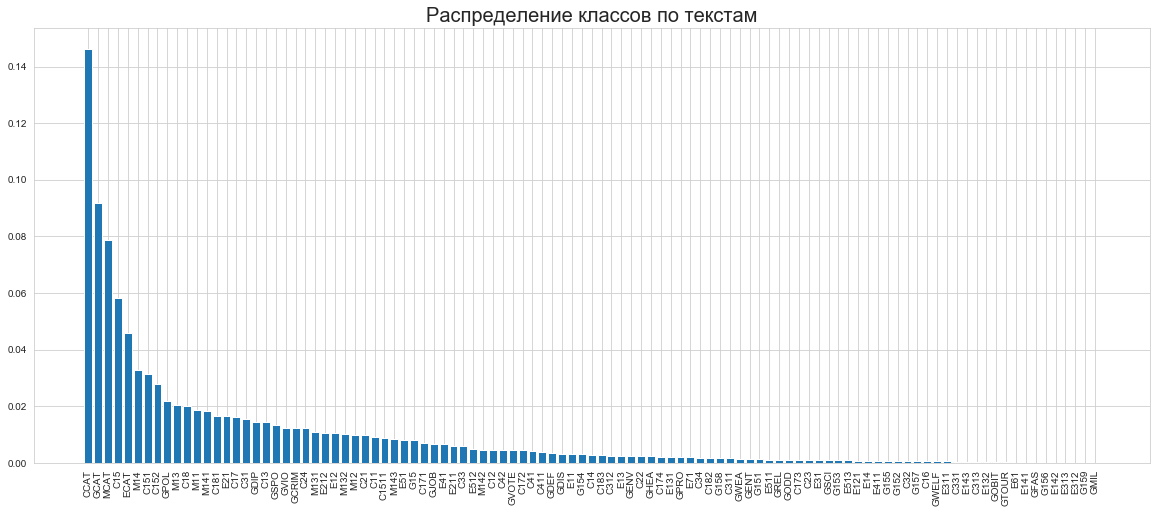

In [67]:
counts = rcv1.target.toarray().sum(axis=0)
names = rcv1.target_names[np.argsort(counts)[::-1]]
counts = np.sort(counts)[::-1]
plt.figure(figsize=(20, 8))
plt.bar(names, counts/counts.sum())
plt.title('Распределение классов по текстам', fontsize=20)
plt.xticks(rotation=90);

In [51]:
tr_indexes, te_indexes = train_test_split(np.arange(rcv1.data.shape[0]), test_size=0.3, shuffle=True)

In [60]:
X_tr = rcv1.data[tr_indexes]
y_tr = rcv1.target[tr_indexes].toarray()
X_te = rcv1.data[te_indexes]
y_te = rcv1.target[te_indexes].toarray()

### Построение моделей

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time
model = RandomForestClassifier(n_estimators=300)
model.fit(X_tr, y_tr)

In [ ]:
%%time
models_dict = {}
for i, name in tqdm_notebook(enumerate(rcv1.target_names)):
    model = LogisticRegression()
    model.fit(X_tr, y_tr[:, i])
    models_dict[name] = model

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
